In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
from geopy.geocoders import Nominatim
import time

data=pd.read_csv("Cambridge Crime Data.csv")
df = data.copy()

In [2]:
data.head()

File Number          Date of Report                      Crime Date Time  \
0  2009-01323  02/21/2009 09:53:00 AM             02/21/2009 09:20 - 09:30   
1  2009-01324  02/21/2009 09:59:00 AM  02/20/2009 22:30 - 02/21/2009 10:00   
2  2009-01327  02/21/2009 12:32:00 PM  02/19/2009 21:00 - 02/21/2009 12:00   
3  2009-01331  02/21/2009 03:05:00 PM             02/21/2009 15:00 - 15:10   
4  2009-01346  02/22/2009 05:02:00 AM                     02/22/2009 05:02   

            Crime  Reporting Area     Neighborhood  \
0         Threats           105.0   East Cambridge   
1      Auto Theft          1109.0  North Cambridge   
2     Hit and Run          1109.0  North Cambridge   
3  Larceny (Misc)          1303.0  Strawberry Hill   
4             OUI           105.0   East Cambridge   

                            Location  
0         100 OTIS ST, Cambridge, MA  
1      400 RINDGE AVE, Cambridge, MA  
2      400 RINDGE AVE, Cambridge, MA  
3      0 NORUMBEGA ST, Cambridge, MA  
4  FIFTH ST & GORE ST, Cambridge, MA

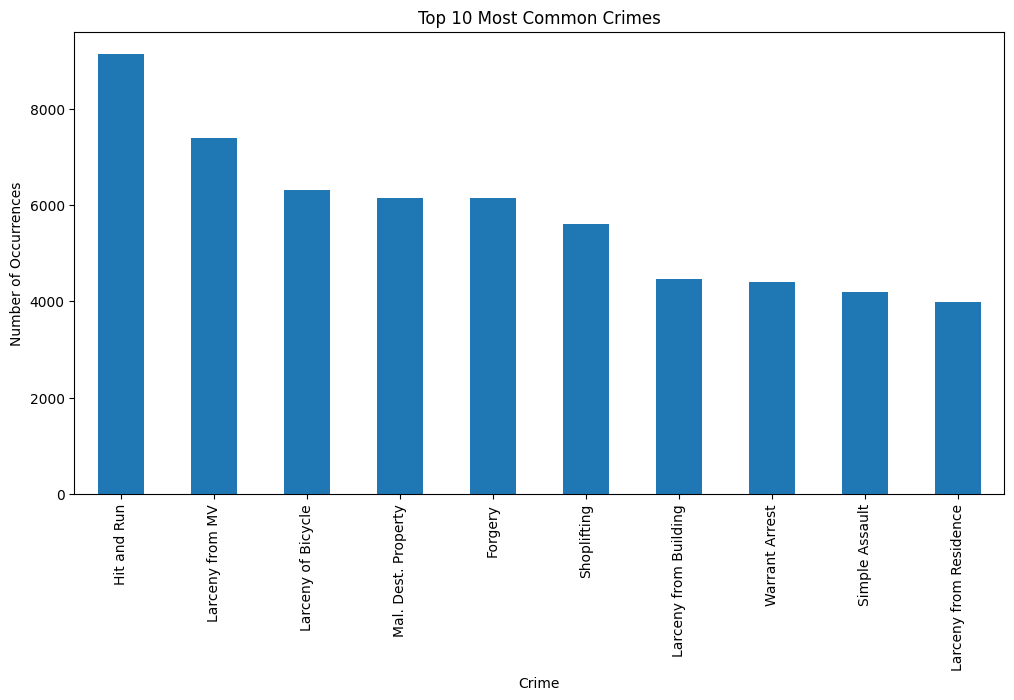

In [3]:
# Most common types of crimes
plt.figure(figsize=(12, 6))
df['Crime'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Crimes')
plt.xlabel('Crime')
plt.ylabel('Number of Occurrences')
plt.show()

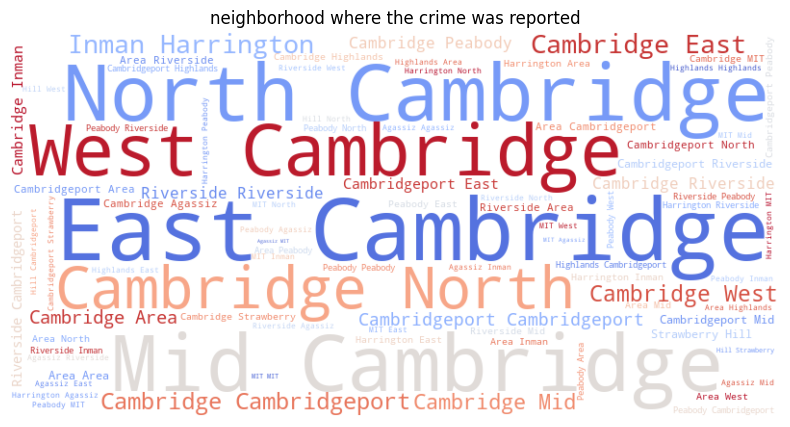

In [4]:

# Neighborhood sütunundaki değerleri boşlukla birleştir (string yap)
text = " ".join(data["Neighborhood"].astype(str))

# Word Cloud oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=100, colormap='coolwarm').generate(text)

# Görselleştir
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("neighborhood where the crime was reported")
plt.show()


In [ ]:
from collections import defaultdict

# Sample Data 
neighborhoods = list(data["Neighborhood"])

# 1. Map
mapped = [(neighborhood, 1) for neighborhood in neighborhoods]

# 2. Shuffle & Sort (Group by key)
grouped = defaultdict(list)
for key, value in mapped:
    grouped[key].append(value)

# 3. Reduce
reduced = {key: sum(values) for key, values in grouped.items()}

# Sorting
sorted_counts = dict(sorted(reduced.items(), key=lambda item: item[1], reverse=True))

# Result
for neighborhood, count in sorted_counts.items():
    print(f"{neighborhood}: {count}")


Cambridgeport: 14496
East Cambridge: 12350
North Cambridge: 10011
Mid-Cambridge: 9932
Area 4: 9535
Riverside: 9518
West Cambridge: 9347
Peabody: 6044
Inman/Harrington: 5818
Highlands: 2639
Agassiz: 2622
MIT: 2017
Strawberry Hill: 1586
nan: 8


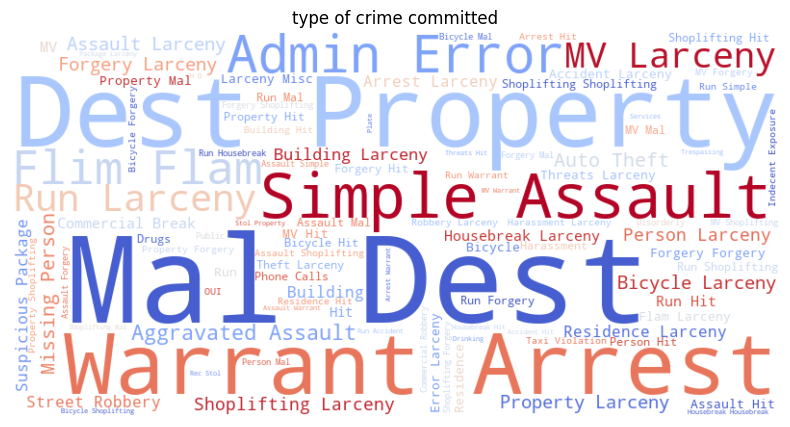

In [34]:
# Crime sütunundaki değerleri boşlukla birleştir (string yap)
text = " ".join(data["Crime"].astype(str))

# Word Cloud oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=100, colormap='coolwarm').generate(text)

# Görselleştir
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("type of crime committed")
plt.show()

In [27]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

# Örnek: rastgele 10 adres
sample_df = data.sample(n=3600, random_state=42).copy()

# Geocoder
geolocator = Nominatim(user_agent="crime_hotspot_locator")

# Koordinatları al ve her zaman iki eleman döndür (lat, lon)
def get_coordinates(address):
    try:
        location = geolocator.geocode(address)
        time.sleep(1)
        if location:
            return pd.Series([location.latitude, location.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

# Fonksiyonu uygula
sample_df[['Latitude', 'Longitude']] = sample_df['Location'].apply(get_coordinates)

# Sonuçları göster
print(sample_df[['Location', 'Latitude', 'Longitude']])


                                   Location   Latitude  Longitude
45554         100 HARVARD ST, Cambridge, MA  42.364731 -71.092975
27642             100 JFK ST, Cambridge, MA        NaN        NaN
22177  500 MASSACHUSETTS AVE, Cambridge, MA  42.364122 -71.101714
46613           100 Broadway, Cambridge, MA  42.363658 -71.086858
6235   300 Massachusetts Ave, Cambridge, MA  42.362085 -71.098899
...                                     ...        ...        ...
59519        0 ST SAUVEUR CT, Cambridge, MA  42.377127 -71.153175
81654  500 MASSACHUSETTS AVE, Cambridge, MA  42.364122 -71.101714
19912             0 INMAN ST, Cambridge, MA  42.367916 -71.104362
14562         0 COGSWELL AVE, Cambridge, MA  42.390730 -71.125142
88569         0 DAVENPORT ST, Cambridge, MA  42.390008 -71.118971

[3600 rows x 3 columns]


In [31]:
sample_df[['Latitude', 'Longitude']].to_excel("sample_df.xlsx")

In [29]:
# Geçerli koordinatlara sahip olanları filtrele
valid_df = sample_df.dropna(subset=['Latitude', 'Longitude'])

# Her suç türüne rastgele bir renk ata
crime_types = valid_df['Crime'].unique()
color_map = {crime: f'#{random.randint(0, 0xFFFFFF):06x}' for crime in crime_types}

# Harita başlangıcı
m = folium.Map(location=[valid_df['Latitude'].mean(), valid_df['Longitude'].mean()], zoom_start=13)

# Markerları ekle
for _, row in valid_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6,
        color=color_map[row['Crime']],
        fill=True,
        fill_opacity=0.7,
        popup=f"Crime: {row['Crime']}<br>Location: {row['Location']}"
    ).add_to(m)

m

In [30]:
m.save("crime_map.html")
